## Applied Machine Learning, Module 1:  A simple classification task

### Import required modules and load data file

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import cm # importing the utility of doing cmaps from matplotlib
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from adspy_shared_utilities import plot_fruit_knn # function that plots colours and dec boundaries acc to the current knn classifier
import os
from pathlib import Path
import warnings

warnings.filterwarnings("ignore")
base_dir = os.path.join('',Path(os.getcwd()).parents[0])
data_dir = os.path.join(base_dir, 'Data')

fruits = pd.read_table(data_dir+'/fruit_data_with_colors.txt')
print(fruits.columns)
fruits.shape

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')


(59, 7)

In [2]:
data_dir

'C:\\Users\\aleex\\Data Science Projects\\Github\\machine-learning-michigan\\Data'

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
# How to assign a numerical value to a name?
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name
# then, if it is not done yet, we would have to apply it to the dataset

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

**Our goal is basically creating a classifier, coming from the dataset above, which is based on a database of past inputs, that could act as a good predictor of future incomes of fruit in order to identify them according to its inputs (in this case, its mass, width, height and color). Having this, the model has to be able to output the fruit and the subtype.**

### Examining the data

So now that we have a training set selected, let's create some simple visualizations to look at how the features in the objects in the training set, in our case different fruits, relate to each other and to the labels. So with these visualizations, we get at least two major benefits. First, we can get an idea of the range of values that each feature takes on. And we could immediately see any unusual outliers that are very different from other points. And that might indicate noise or a missing feature or other problem with the data set. And second, we may be able to get a better idea how likely it is that a machine learning algorithm could do well at predicting the different classes. By seeing how well clustered and well separated the different types of objects are in feature space

In [5]:
columns = list(fruits.columns)
for i in columns:
    print(fruits[i].value_counts)

<bound method IndexOpsMixin.value_counts of 0     1
1     1
2     1
3     2
4     2
5     2
6     2
7     2
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    3
25    3
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    4
44    4
45    4
46    4
47    4
48    4
49    4
50    4
51    4
52    4
53    4
54    4
55    4
56    4
57    4
58    4
Name: fruit_label, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0        apple
1        apple
2        apple
3     mandarin
4     mandarin
5     mandarin
6     mandarin
7     mandarin
8        apple
9        apple
10       apple
11       apple
12       apple
13       apple
14       apple
15       apple
16       apple
17       apple
18       apple
19       apple
20       apple
21       apple
22       apple
23       apple
24      orange
25      orange
26      orange
27

<IPython.core.display.Javascript object>


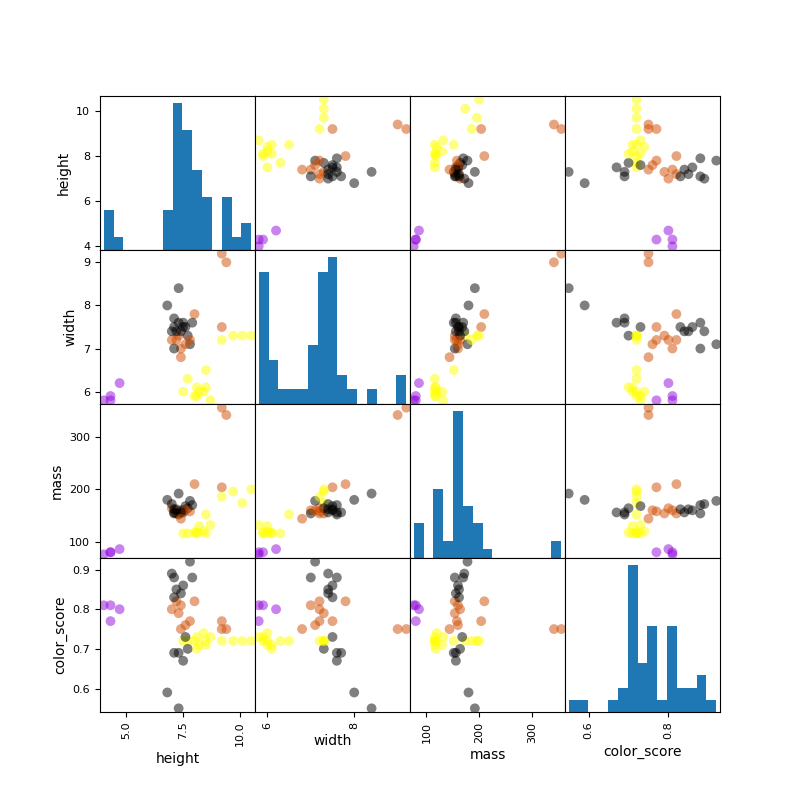

In [6]:
# plotting a scatter matrix

x = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(x_train, c=y_train, marker = 'o', s=50, hist_kwds={'bins':15}, figsize=(8,8), cmap=cmap)

<IPython.core.display.Javascript object>


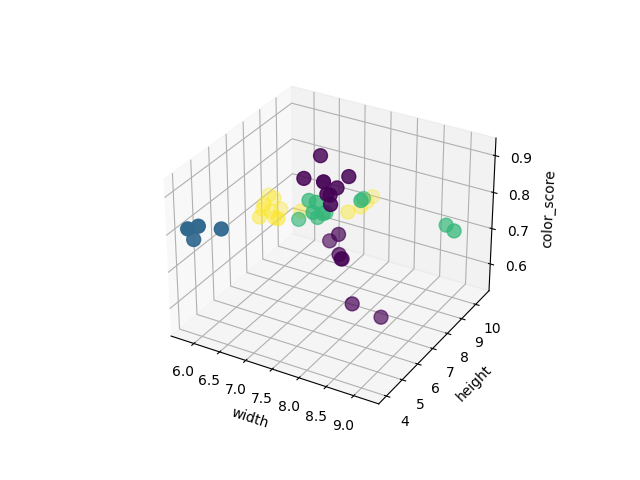

In [7]:
# Plotting a 3D scatter plot
# In order to see how clusters are differenciated. The ultimate goal is knowing whether the data is correctly distributed to be used as a predictor

from mpl_toolkits.mplot3d import Axes3D # importing the utility of 3d from mpl

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_train['width'],x_train['height'],x_train['color_score'], c=y_train, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train-test split

So since our only source of labeled data is the dataset we've been given, to estimate how well the classifier will do on future samples, what we'll do is split the original dataset into two parts. We'll have an array of labeled samples called the training set that will be used to train the classifier. And then we'll hold out the remaining labeled samples and put them into a second separate array called the test set that will be used to then evaluate the trained classifier

In [8]:
x = fruits[['mass','width','height']] # These are the parameters that will give us the predictions
y = fruits['fruit_label'] # This is what we want to know about the pieces

# default is 75% / 25% train-test split

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0) # standard split method with random_state=0 (75%-25%)

**Two different datasets are created for each group of variables, one will be used to train the method/predictor and the other one to test it. Input and output variables are split in order to enable this dataset to carry out the process**

In [9]:
print(x_train.shape) # test parameters
x_train.head()

(44, 3)


,mass,width,height
42,154,7.2,7.2
48,174,7.3,10.1
7,76,5.8,4.0
14,152,7.6,7.3
32,164,7.2,7.0


In [10]:
print(y_train.shape) # train labels
y_train.head()

(44,)


42    3
48    4
7     2
14    1
32    3
Name: fruit_label, dtype: int64

In [11]:
print(x_test.shape) # test parameters
x_test.head()

(15, 3)


,mass,width,height
26,362,9.6,9.2
35,150,7.1,7.9
43,194,7.2,10.3
28,140,6.7,7.1
11,172,7.1,7.6


In [12]:
print(y_test.shape) # test labels
y_test.head()

(15,)


26    3
35    3
43    4
28    3
11    1
Name: fruit_label, dtype: int64

**So this way, 15 (25%) of the original rows are let by in order to be used for evaluating. The 75% of them (x_train) are used to build the model**

## K-Nearest Neighbours Method for classification and regression

** The k-NN algorithm has three steps that can be specified:** 
- First of all, when given a new previously unseen instance of something to classify, a k-NN classifier will look into its set of memorized training examples to find the k examples that have closest features. In other words, it will find, for a x_test, the most similar x_train instances (X_NN).

- Then the classifier will look up the class labels for those k-Nearest Neighbor examples. So it will get the labels in y_train of the selected x_train instances (Y_NN)

- Once it's done that, it will combine the labels of those examples to make a prediction for the label of the new object. Typically, for example, by using simple majority vote. In other words, it will predict the y_test for x_test using Y_NN by applying a defined method

### Create classifier object

**More generally, to use the nearest neighbor algorithm, we specify four things:**

- First, we need to define what distance means in our future space, so we know how to properly select the nearby neighbors. In the example that I just showed you with the fruit data set, we used the simple straight line, or euclidean distance to measure the distance between points.
- Second, we must tell the algorithm how many of these nearest neighbors to use in making a prediction. This must be a number that is at least one. If it is greater than one and we do not specify anything else, the method to decide the label will be simple majority in the proximity (if three of the closest five points are orange-labeled parameters, that x_test input will be an orange
- Third, we may want to give some neighbors more influence on the outcome. For example, we may decide that neighbors that are closer to the new instance that we're trying to classify, should have more influence, or more votes on the final label, by effecting them through a multiplier value.
- Once we have the labels of the k nearby points, we must specify how to combine them to produce a final prediction.  - DEFINE A METHOD OTHER THAN SIMPLE MAJORITY VOTE

<img src='Captura1.PNG'>

In [13]:
knn = KNeighborsClassifier(n_neighbors = 5) # we just set the k=5 (num of neighbors taken in account for each x_test income is 5)
knn

KNeighborsClassifier()

### Training the classifier (fit the estimator) using the training data

In [14]:
# adapting our classifier to the data we are managing to develop as trainers
knn.fit(x_train, y_train)

KNeighborsClassifier()

### Testing the classifier - Looking up whether it is able to predict future incomes

**Estimate the accuracy of the classifier on future data, using the test data - knn.score(x_test,y_test) method**

In [15]:
knn.score(x_test,y_test)

0.5333333333333333

So, 53,3% of the future income labels' will be correctly specified by this predictor. In other words, corresponding y_test will be true for the 53,3% of x_test passed by this method

**Use the trained k-NN classifier model to classify new, previously unseen objects - knn.predict() method**

Assigning a label to individual objects (data) not coming from x_test

In [16]:
x_test.columns

Index(['mass', 'width', 'height'], dtype='object')

In [17]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

In [18]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100,6.3,8.5]])
lookup_fruit_name[fruit_prediction[0]]

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'lemon'

**Representing coloured plots and setting decision boundaries for the knn classifier**

<IPython.core.display.Javascript object>


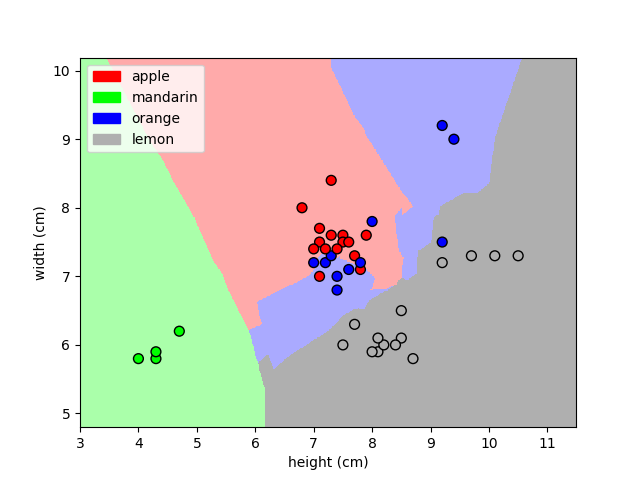

C:\Users\aleex\Data Science Projects\Github\machine-learning-michigan\Notebooks\adspy_shared_utilities.py:197: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


In [19]:
plot_fruit_knn(x_train,y_train, 5,'uniform') # uniform means the ponderating method: in this case, we treat equally the top 5 closest points

In [20]:
plt.savefig("fruit_knn.png")

<IPython.core.display.Javascript object>


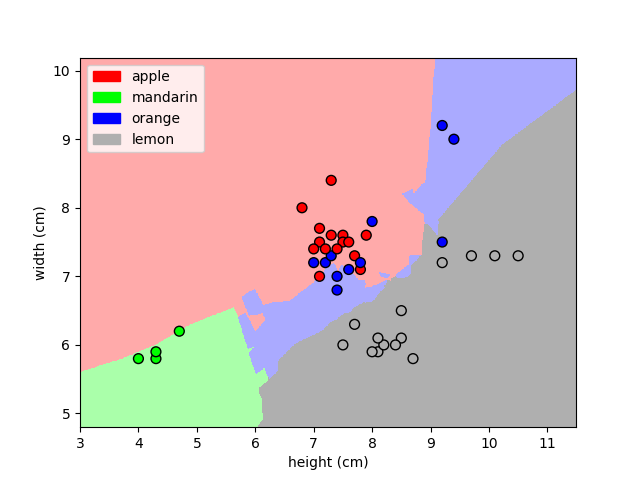

C:\Users\aleex\Data Science Projects\Github\machine-learning-michigan\Notebooks\adspy_shared_utilities.py:197: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


In [21]:
# k =10
plot_fruit_knn(x_train,y_train,10,'uniform')

<IPython.core.display.Javascript object>


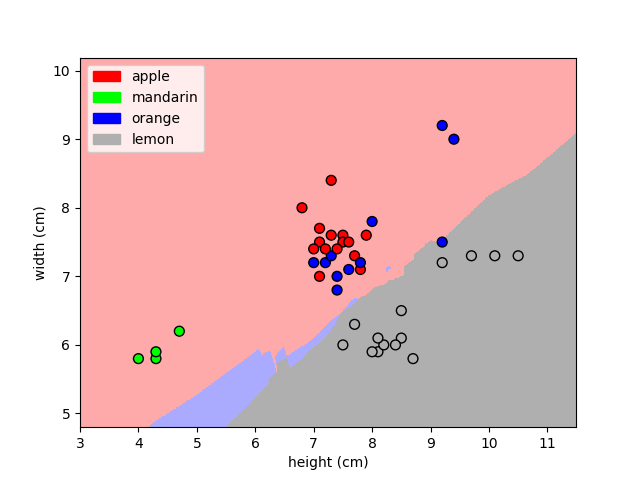

C:\Users\aleex\Data Science Projects\Github\machine-learning-michigan\Notebooks\adspy_shared_utilities.py:197: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


In [22]:
# k = 20
plot_fruit_knn(x_train,y_train,20,'uniform')

<IPython.core.display.Javascript object>


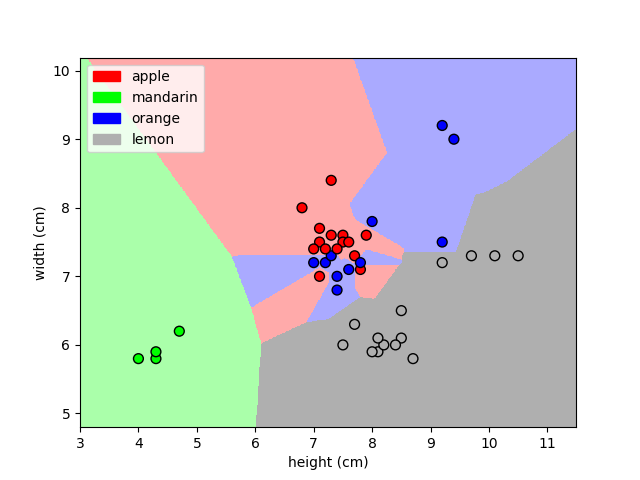

C:\Users\aleex\Data Science Projects\Github\machine-learning-michigan\Notebooks\adspy_shared_utilities.py:197: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


In [23]:
# k =1
plot_fruit_knn(x_train,y_train,1,'uniform')

**For larger values of K, the areas assigned to different classes are smoother and not as fragmented and more robust to noise in the individual points. But possibly with some mistakes, more mistakes in individual points. This is an example of what's known as the bias variance tradeoff. And we'll look at that phenomenon and its implications in more depth in next week's class.**

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

**Measuring how accuracy differs depending on the chosen number of points (k) neighbors**

<IPython.core.display.Javascript object>


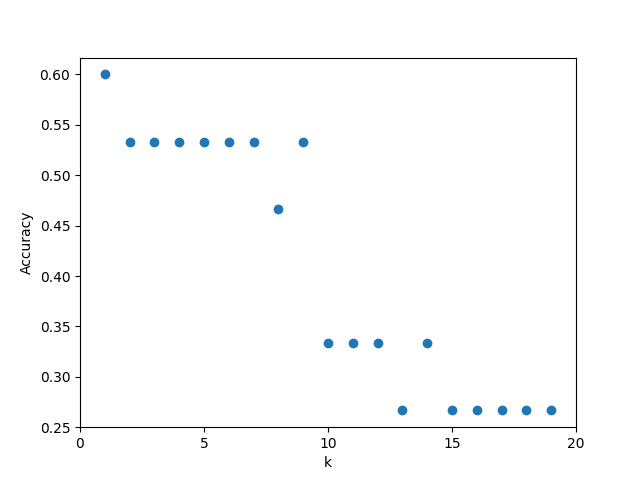

In [24]:
k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    sc = knn.score(x_test, y_test)
    scores.append(sc)

plt.figure()
plt.scatter(k_range,scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks([0,5,10,15,20]);

For this data and having chosen a uniform model selection and a standard 75%-25% distribution of training and testing split criteria, the best k parameter to maximize accuracy of the predictor is k=1. The highest k the worse the prediction would be having the named conditionals

### How sensitive is k-NN classification accuracy to the train/test split proportion?

*Standard train/test proportion is 75%-25% (TRAIN/TEST)*

**Measuring how accuracy differs depending on the chosen proportion for data split criteria**

<IPython.core.display.Javascript object>


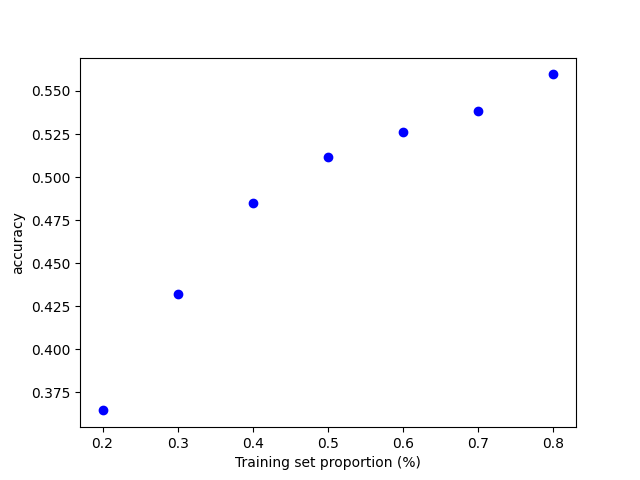

In [25]:
# Supposing k=5
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1-s)
        knn.fit(x_train, y_train)
        scores.append(knn.score(x_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

<IPython.core.display.Javascript object>


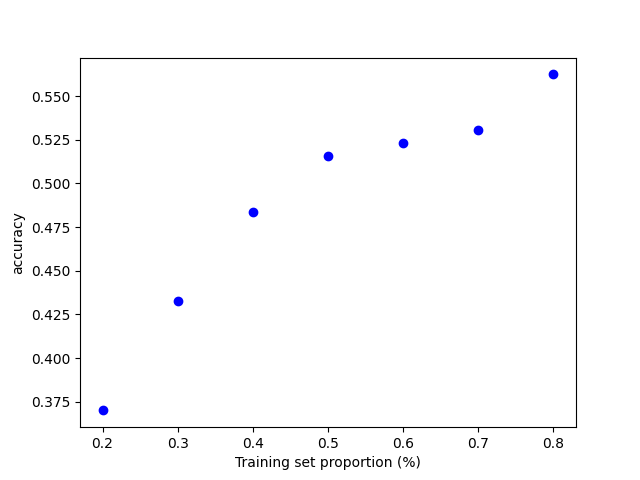

In [26]:
# Supposing k=1
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2] # test proportion

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1-s)
        knn.fit(x_train, y_train)
        scores.append(knn.score(x_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

**So minimum test proportion size (used t=0.25 as standard train proportion is 0.75) and minimum k (k=1) is the optimal approach in order to set up and adequate knn classifier having the given data**